In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from qiskit import QuantumCircuit, QuantumRegister

sys.path.append('../')

In [5]:
with open('../data/images.npy', 'rb') as f:
    images = np.load(f)
with open('../data/labels.npy', 'rb') as f:
    labels = np.load(f)

True


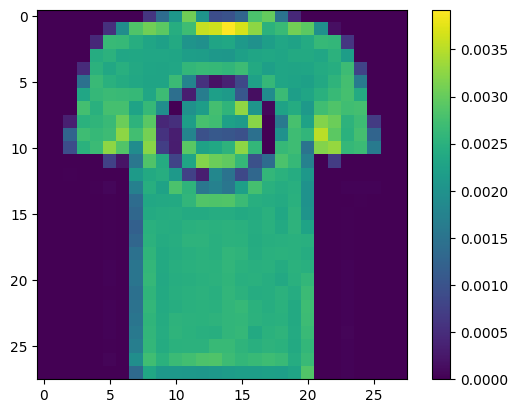

False


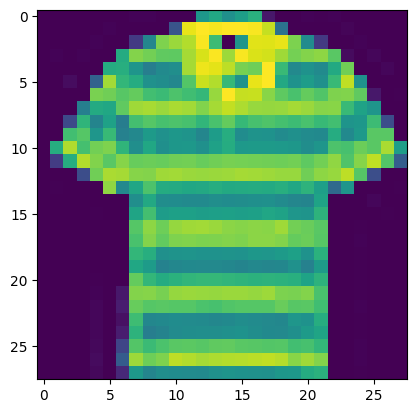

In [65]:
true = False
false = False
for i, label in enumerate(labels[100:]):
    if not true and label:
        print(label)
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        true = True

    if not false and not label:
        print(label)
        plt.imshow(images[i])
        plt.show()
        false = True

    if true and false:
        break

In [66]:
images_resized = np.resize(images, (len(images), 4, 4))
images_resized.shape

(2000, 4, 4)

True


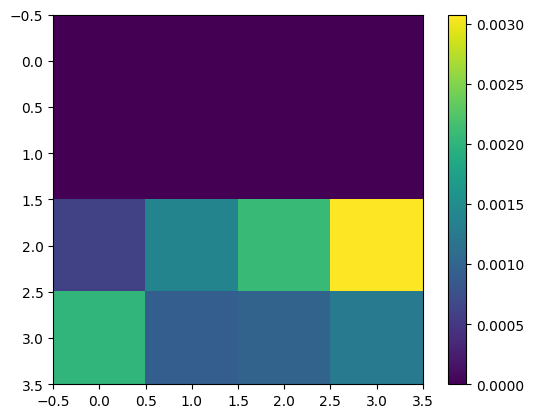

False


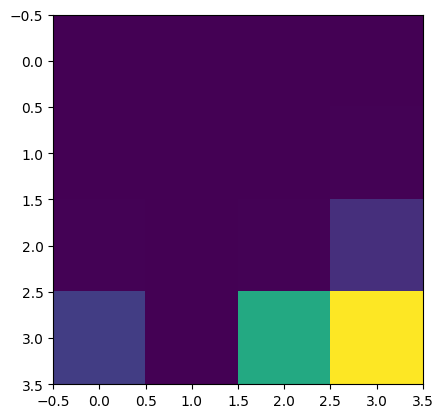

In [68]:
true = False
false = False
for i, label in enumerate(labels[5:]):
    if not true and label:
        print(label)
        plt.imshow(images_resized[i])
        plt.colorbar()
        plt.show()
        true = True

    if not false and not label:
        print(label)
        plt.imshow(images_resized[i])
        plt.show()
        false = True

    if true and false:
        break

In [74]:
from encoder import Encoder

In [75]:
E = Encoder(images)

In [84]:
make_filter = lambda n: np.ones((n, n))
make_filter(5)


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [85]:
from scipy.signal import convolve2d

In [188]:
def reduce_size(kernel, image):
    Nx, Ny = image.shape
    kx, ky = kernel.shape
    Dx = Nx//kx
    Dy = Ny//ky
    new_image = np.zeros((Dx, Dy))
    for x in range(Dx):
        for y in range(Dy):
            new_image[x, y] = np.sum(kernel * image[kx*x: kx*(x +1), ky*y: ky*(y+1)])
    return new_image

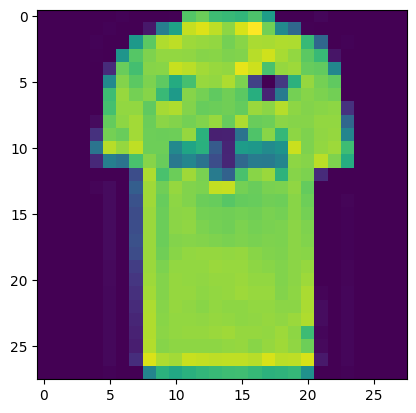

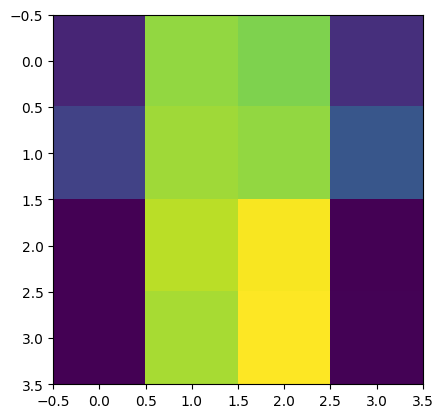

In [193]:
kernel = np.ones((7, 7))
im = images[2]
plt.imshow(im)
plt.show()
plt.imshow(reduce_size(kernel, im))

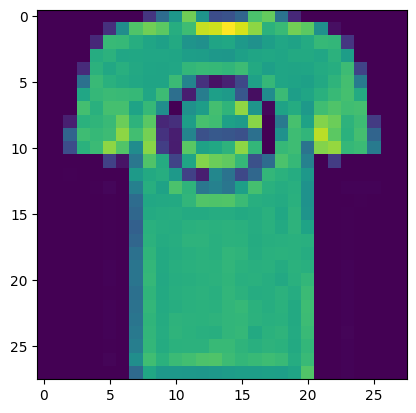

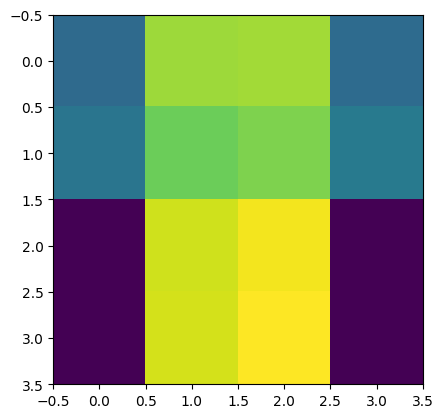

In [194]:
im = images[0]
plt.imshow(im)
plt.show()
plt.imshow(reduce_size(kernel, im))

In [195]:
def decoder(kernel, image_resized):
    Nx, Ny = image_resized.shape
    kx, ky = kernel.shape
    Dx = Nx*kx
    Dy = Ny*ky
    new_image = np.zeros((Dx, Dy))
    for x in range(Nx):
        for y in range(Ny):
            new_image[kx*x: kx*(x +1), ky*y: ky*(y+1)] = kernel * image_resized[x, y]
    return new_image

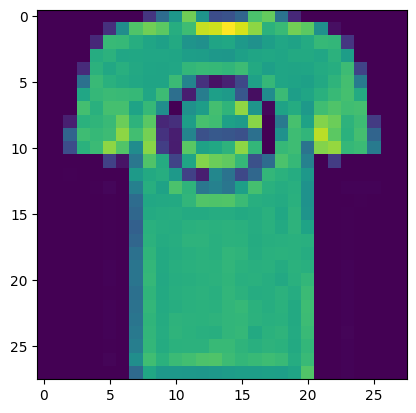

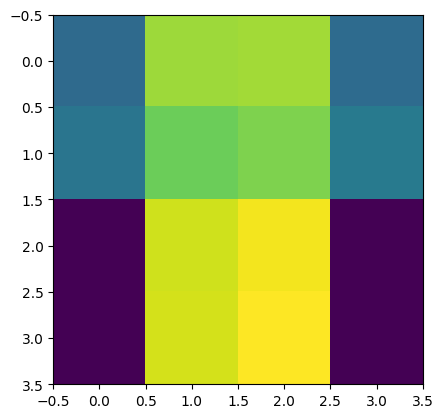

(28, 28)


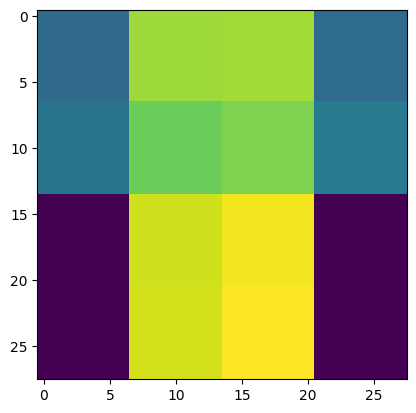

In [197]:
im = images[0]
plt.imshow(im)
plt.show()
im_reduzed = reduce_size(kernel, im)
plt.imshow(im_reduzed)
plt.show()
im_decode = decoder(kernel, im_reduzed)
print(im_decode.shape)
plt.imshow(im_decode)

In [198]:
def encoder(kernel, image):
    Nx, Ny = image.shape
    kx, ky = kernel.shape
    Dx = Nx//kx
    Dy = Ny//ky
    new_image = np.zeros((Dx, Dy))
    for x in range(Dx):
        for y in range(Dy):
            new_image[x, y] = np.sum(kernel * image[kx*x: kx*(x +1), ky*y: ky*(y+1)])
    return new_image

def decoder(kernel, image_resized):
    Nx, Ny = image_resized.shape
    kx, ky = kernel.shape
    Dx = Nx*kx
    Dy = Ny*ky
    new_image = np.zeros((Dx, Dy))
    for x in range(Nx):
        for y in range(Ny):
            new_image[kx*x: kx*(x +1), ky*y: ky*(y+1)] = kernel * image_resized[x, y]
    return new_image

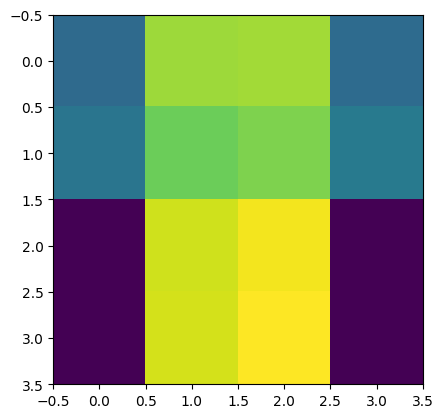

In [204]:
a = np.ndarray.flatten(im_reduzed)
plt.imshow(np.reshape(a, (4, 4)))

In [218]:
from  itertools import product
a = np.array(list(product((0,1), repeat=3)))
a

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [257]:
nq = 3
for i in range(1, nq+1):
    jump = len(a)//2**i
    print(i)
    for j in range(0, 2**i, 2):
        print(a[j*jump:(j+1)*jump])

1
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]
2
[[0 0 0]
 [0 0 1]]
[[1 0 0]
 [1 0 1]]
3
[[0 0 0]]
[[0 1 0]]
[[1 0 0]]
[[1 1 0]]


In [287]:
for q in range(1, nq+1):
    print(q)
    print(np.array(np.split(a,2**q))[np.arange(0,2**q,2)])

1
[[[0 0 0]
  [0 0 1]
  [0 1 0]
  [0 1 1]]]
2
[[[0 0 0]
  [0 0 1]]

 [[1 0 0]
  [1 0 1]]]
3
[[[0 0 0]]

 [[0 1 0]]

 [[1 0 0]]

 [[1 1 0]]]


In [302]:
from part1_leander import Encoder, execute_circuit, basis_states_probs

In [334]:
Enc = Encoder(images)

In [335]:
qc0 = Enc.encode(Enc.images[0])


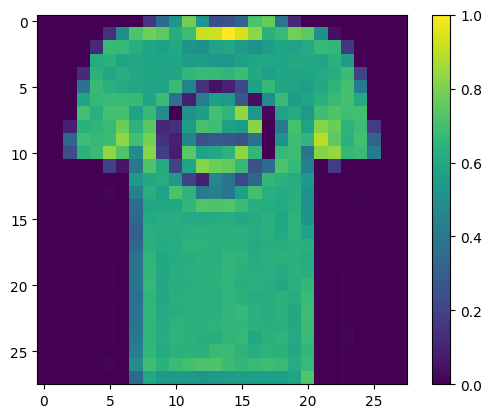

In [336]:
plt.imshow(Enc.images[0])
plt.colorbar()

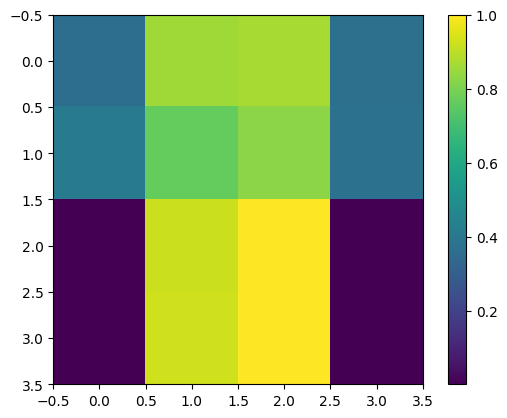

In [337]:
plt.imshow(Enc.reduze_size(Enc.images[0]))
plt.colorbar()

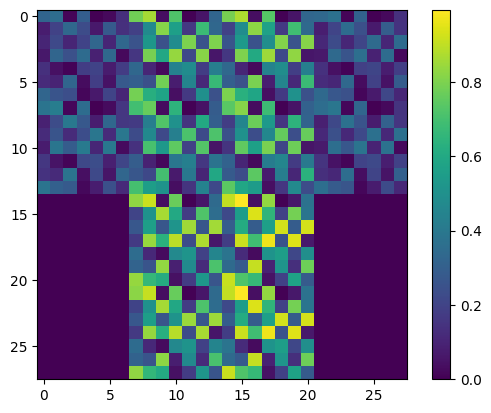

In [339]:
plt.imshow(Enc.decoder(basis_states_probs(execute_circuit(qc0, shots=2048))))
plt.colorbar()

In [332]:
Enc.kernel

array([[0.17733022, 0.90326625, 0.85532799, 0.60906616, 0.76052469,
        0.37947473, 0.44973142],
       [0.28997755, 0.88428614, 0.87874722, 0.70379938, 0.39388533,
        0.19456901, 0.49985736],
       [0.36855625, 0.84114466, 0.84852811, 0.76374497, 0.81260802,
        0.50522628, 0.61242416],
       [0.95448135, 0.50850716, 0.30165681, 0.63225594, 0.68800056,
        0.71328903, 0.05917504],
       [0.94692921, 0.44175437, 0.29834634, 0.45558025, 0.44346004,
        0.54500455, 0.58587086],
       [0.2601104 , 0.37547105, 0.92753458, 0.13498   , 0.78222224,
        0.65768901, 0.98407359],
       [0.61372569, 0.8470076 , 0.27567834, 0.11184065, 0.55031407,
        0.12363937, 0.79585487]])

In [340]:
Training = Encoder(images)

[[0.61871826 0.70334972 0.24402944 0.1206302  0.08586085 0.95620418
  0.66731518]
 [0.57468388 0.04663536 0.88553128 0.69822102 0.57071709 0.90856541
  0.03069675]
 [0.54836637 0.98897524 0.59146422 0.15012359 0.05473024 0.65164427
  0.25089552]
 [0.66714752 0.49108168 0.29323283 0.78735641 0.71315646 0.31977285
  0.17043008]
 [0.68486674 0.19373286 0.34893579 0.86898391 0.97558315 0.64430889
  0.27894991]
 [0.14313609 0.21446054 0.54967537 0.12181087 0.19393524 0.76478669
  0.70049211]
 [0.72585046 0.52151195 0.25342047 0.48556594 0.72327961 0.43959089
  0.20616059]]


In [348]:
Training.optimize()

(98,)
Call to f
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\reasc\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\reasc\AppData\Local\Temp\ipykernel_15184\1199362531.py", line 1, in <module>
    Training.optimize()
  File "c:\Users\reasc\OneDrive - Universidade do Minho (1)\iQuHack\2023_IonQ_Remote\Part1\part1_leander.py", line 111, in optimize
  File "c:\Users\reasc\miniconda3\lib\site-packages\scipy\optimize\_minimize.py", line 694, in minimize
    res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
  File "c:\Users\reasc\miniconda3\lib\site-packages\scipy\optimize\_optimize.py", line 1283, in _minimize_bfgs
    sf = _prepare_scalar_function(fun, x0, jac, args=args, epsilon=eps,
  File "c:\Users\reasc\miniconda3\lib\site-packages\scipy\optimize\_optimize.py", line 263, in _prepare_scalar_function
    sf = ScalarFunction(fun, x0, args, grad, hess,
  File "c:\Users\reasc\mini

In [350]:
from scipy.optimize import minimize


In [352]:
def f(x):
    print(x)
    return np.sum(x)

x = np.random.random(7*7*2)
minimize(f, x, method='SLSQP')

[0.22845018 0.9612719  0.46175416 0.67592987 0.90334282 0.30906336
 0.15231796 0.08860281 0.73615557 0.38347973 0.34922499 0.49003109
 0.1251766  0.47539664 0.3512994  0.65170863 0.32660533 0.99684996
 0.12862194 0.93340705 0.54044738 0.14232182 0.72575088 0.09543692
 0.721658   0.57492578 0.37546578 0.63534234 0.94181512 0.98015652
 0.17678793 0.89605051 0.47709975 0.55869457 0.16829591 0.51920025
 0.27882529 0.25565954 0.8687846  0.94168209 0.71321627 0.84592776
 0.28864766 0.16849603 0.69283165 0.98893891 0.81966836 0.75055011
 0.57961115 0.00899929 0.46077317 0.92799217 0.07207411 0.19465791
 0.18628411 0.72976819 0.0635476  0.51536472 0.39679569 0.09726099
 0.10571238 0.41025825 0.9346375  0.17859312 0.48075086 0.99865809
 0.18501738 0.20705017 0.63217885 0.0316452  0.32978868 0.61159198
 0.83195917 0.1052935  0.64143468 0.03095463 0.98929907 0.10115247
 0.38895387 0.74026688 0.62787128 0.07618755 0.00140173 0.13675373
 0.472492   0.20003781 0.39488764 0.2298573  0.12215047 0.6001

     fun: -681928045.8440423
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 1386
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([-6958447.38075396, -6958446.64793221, -6958447.14744995,
       -6958446.93327424, -6958446.70586132, -6958447.30014073,
       -6958447.45688616, -6958447.5206013 , -6958446.87304851,
       -6958447.2257244 , -6958447.25997914, -6958447.11917304,
       -6958447.48402753, -6958447.13380749, -6958447.2579047 ,
       -6958446.95749549, -6958447.28259878, -6958446.61235415,
       -6958447

In [1]:
from part1_leander import Encoder
test = Encoder(images)

[[0.17698422 0.59063119 0.27235517 0.84163542 0.77047951 0.23900035
  0.17010766]
 [0.33785869 0.66108701 0.35479193 0.89378034 0.7616676  0.81246757
  0.61870071]
 [0.14114061 0.29132712 0.52215825 0.27340629 0.46742738 0.69116303
  0.61165899]
 [0.52774641 0.04866474 0.93644238 0.75829921 0.40736701 0.59000125
  0.2002048 ]
 [0.27272582 0.99802877 0.5814426  0.05111055 0.03578179 0.15263358
  0.32632922]
 [0.22133907 0.84804583 0.24130708 0.55333513 0.7593487  0.14668998
  0.43580166]
 [0.96396022 0.94219233 0.41518596 0.00199945 0.85464038 0.48179475
  0.86661668]]
(98,)


AttributeError: Can't pickle local object 'Encoder.parallelize.<locals>.parallel_f'

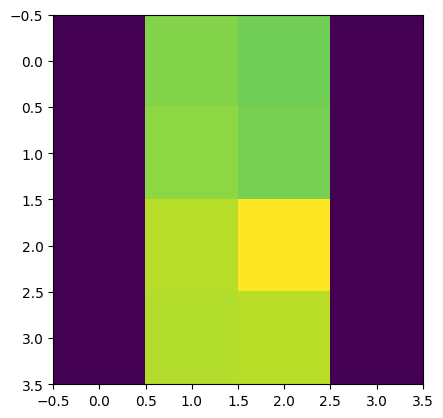

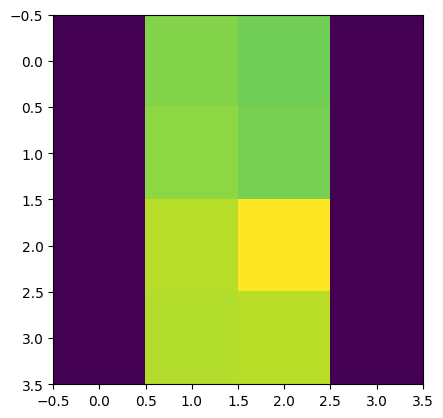

In [368]:
image = test.images[1100]
plt.imshow(test.reduze_size(image))
plt.show()
probs = np.ndarray.flatten(test.reduze_size(image))
plt.imshow(np.resize(probs, (4,4)))
plt.show()


In [370]:
test.apply_decoder(test.kernel, probs)

ValueError: not enough values to unpack (expected 2, got 1)